In [2]:
# =========================================
# 📂 Import Libraries & Load Dataset
# =========================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Load dataset
x = pd.read_csv("heart_disease_uci.csv")

# Preview first 10 rows
x.head(10)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [3]:
# =========================================
# 🔍 Dataset Information
# =========================================
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# =========================================
# ❓ Check Missing Values
# =========================================
x.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
# =========================================
# 📊 Identify Columns with Missing Data
# =========================================
missing_values = x.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

numerical_columns = x.select_dtypes(include=np.number).columns.tolist()
categorical_columns = x.select_dtypes(include='object').columns.tolist()

numerical_columns_with_missing_values = [col for col in columns_with_missing_values if col in numerical_columns]
categorical_columns_with_missing_values = [col for col in columns_with_missing_values if col in categorical_columns]

print("Numerical columns with missing values:", numerical_columns_with_missing_values)
print("Categorical columns with missing values:", categorical_columns_with_missing_values)


Numerical columns with missing values: ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical columns with missing values: ['fbs', 'restecg', 'exang', 'slope', 'thal']


In [6]:
# =========================================
# 🛠 Median Imputation Values (Numerical)
# =========================================
numerical_imputation_values = {
    col: x[col].median() for col in numerical_columns_with_missing_values
}

print("Median values for numerical columns with missing values:")
print(numerical_imputation_values)


Median values for numerical columns with missing values:
{'trestbps': np.float64(130.0), 'chol': np.float64(223.0), 'thalch': np.float64(140.0), 'oldpeak': np.float64(0.5), 'ca': np.float64(0.0)}


In [7]:
# =========================================
# 🛠 Mode Imputation Values (Categorical)
# =========================================
categorical_imputation_values = {
    col: x[col].mode()[0] for col in categorical_columns_with_missing_values
}

print("Mode values for categorical columns with missing values:")
print(categorical_imputation_values)


Mode values for categorical columns with missing values:
{'fbs': False, 'restecg': 'normal', 'exang': False, 'slope': 'flat', 'thal': 'normal'}


In [8]:
# =========================================
# 🧹 Apply Missing Value Imputation
# =========================================
for col, median_value in numerical_imputation_values.items():
    x[col].fillna(median_value, inplace=True)

for col, mode_value in categorical_imputation_values.items():
    x[col].fillna(mode_value, inplace=True)

# Confirm no missing values remain
x.isnull().sum()


C:\Users\night\AppData\Local\Temp\ipykernel_33504\1821559767.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x[col].fillna(median_value, inplace=True)
C:\Users\night\AppData\Local\Temp\ipykernel_33504\1821559767.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# =========================================
# ✂ Drop Unnecessary Columns
# =========================================
x = x.drop(['ca', 'thal'], axis=1)
x.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [10]:
# =========================================
# 🔄 One-Hot Encode Categorical Variables
# =========================================
categorical_columns = x.select_dtypes(include='object').columns.tolist()

x_encoded = pd.get_dummies(x, columns=categorical_columns)

display(x_encoded.head())
print(x_encoded.info())


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping
0,1,63,145.0,233.0,True,150.0,False,2.3,0,False,...,False,False,False,True,True,False,False,True,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,2,False,...,True,False,False,False,True,False,False,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,1,False,...,True,False,False,False,True,False,False,False,True,False
3,4,37,130.0,250.0,False,187.0,False,3.5,0,False,...,False,False,True,False,False,True,False,True,False,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0,True,...,False,True,False,False,True,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    bool   
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    bool   
 7   oldpeak                   920 non-null    float64
 8   num                       920 non-null    int64  
 9   sex_Female                920 non-null    bool   
 10  sex_Male                  920 non-null    bool   
 11  dataset_Cleveland         920 non-null    bool   
 12  dataset_Hungary           920 non-null    bool   
 13  dataset_Switzerland       920 non-null    bool   
 14  dataset_VA

In [11]:
# =========================================
# 📊 Train-Test Split
# =========================================
from sklearn.model_selection import train_test_split

X = x_encoded.drop(['num', 'id'], axis=1)
y = x_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (736, 23)
Shape of X_test: (184, 23)
Shape of y_train: (736,)
Shape of y_test: (184,)


In [12]:
# =========================================
# 📏 Standardize Numerical Features
# =========================================
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = X_train.select_dtypes(include=np.number).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on train, transform both train & test
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Preview scaled features
display(X_train.head())


,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Female,sex_Male,dataset_Cleveland,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping
880,0.902413,-0.083946,-0.262575,False,-0.694187,True,1.983624,False,True,False,...,True,False,False,False,False,False,True,False,True,False
457,0.034776,0.987771,0.223659,False,-0.614999,False,-0.794406,False,True,False,...,False,False,True,False,False,True,False,False,True,False
797,-0.290587,-0.083946,1.287871,False,0.097694,False,-0.331401,False,True,False,...,False,False,True,False,False,True,False,False,True,False
25,-0.399042,-0.619805,0.186962,False,0.810387,False,0.687210,True,False,True,...,False,False,True,False,False,True,False,False,True,False
84,-0.182133,-0.619805,1.159431,False,1.364703,False,-0.609204,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [13]:
# =========================================
# 🔍 Dimensionality Reduction (PCA)
# =========================================
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))


Shape of X_train_pca: (736, 13)
Shape of X_test_pca: (184, 13)
Explained variance ratio: [0.23111843 0.16307003 0.11113102 0.10412632 0.09171776 0.0470158
 0.0438522  0.0390138  0.03272352 0.02720021 0.02309272 0.01900588
 0.01801213]
Total explained variance: 0.951079803025451


C:\Users\night\AppData\Local\Temp\ipykernel_33504\2894857169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x, x='sex', palette='Set2', edgecolor='black')


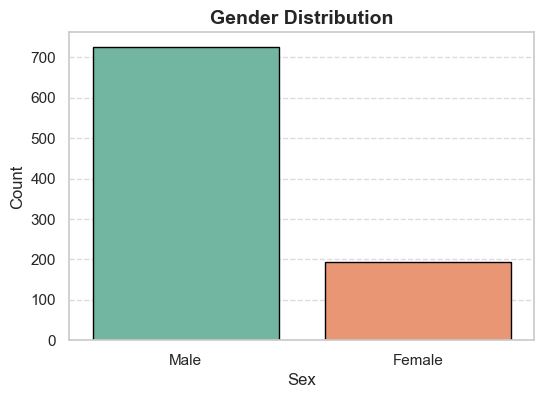

In [14]:
# =========================================
# 📊 Visualization: Gender Distribution
# =========================================
plt.figure(figsize=(6, 4))
sns.countplot(data=x, x='sex', palette='Set2', edgecolor='black')
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\night\AppData\Local\Temp\ipykernel_33504\2036498120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x, x='cp', palette='viridis', edgecolor='black')


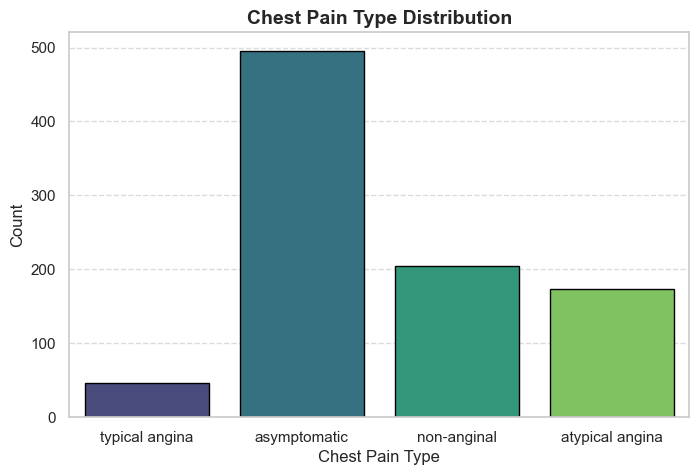

In [15]:
# =========================================
# 📊 Visualization: Chest Pain Type
# =========================================
plt.figure(figsize=(8, 5))
sns.countplot(data=x, x='cp', palette='viridis', edgecolor='black')
plt.title('Chest Pain Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


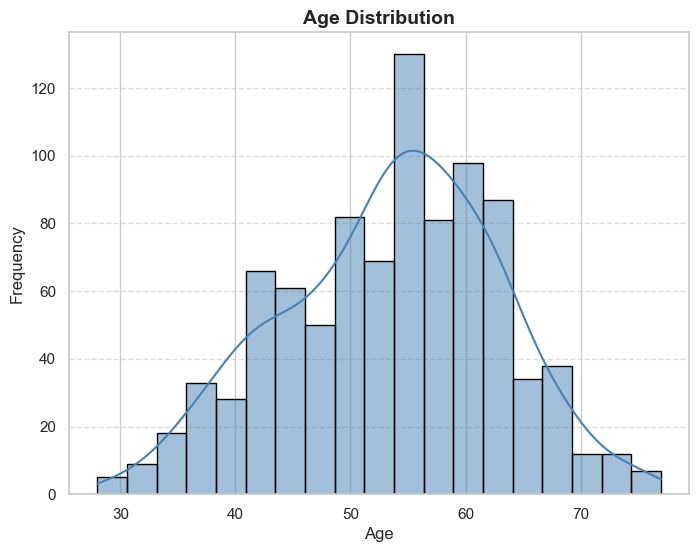

In [16]:
# =========================================
# 📊 Visualization: Age Distribution
# =========================================
plt.figure(figsize=(8, 6))
sns.histplot(data=x, x='age', kde=True, color='steelblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


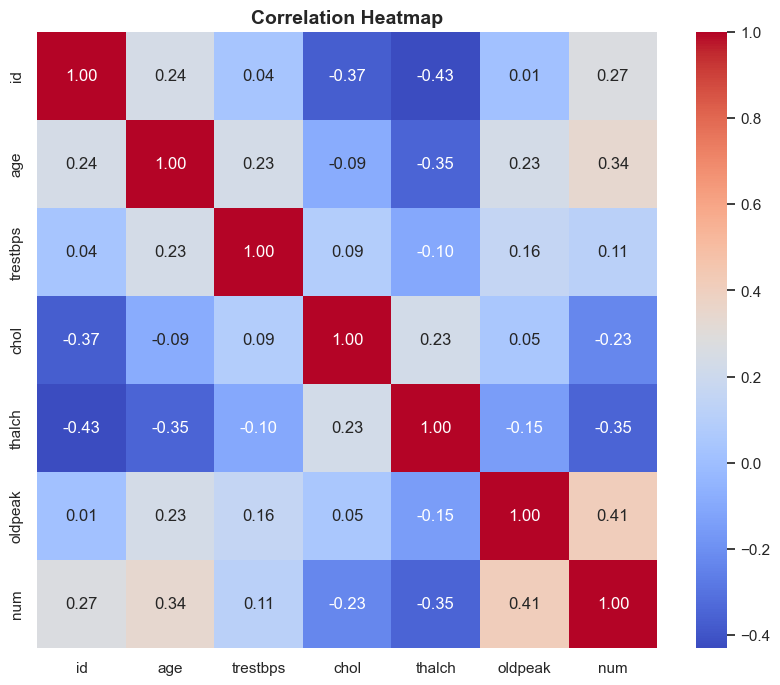

In [17]:
# =========================================
# 📊 Correlation Heatmap (Numerical Features)
# =========================================
numerical_x = x.select_dtypes(include=np.number)
correlation_matrix = numerical_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


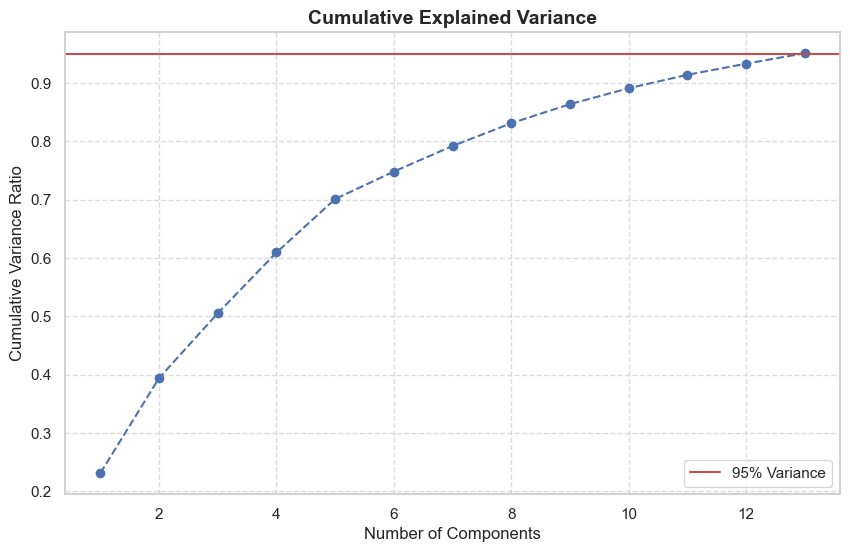

In [18]:
# =========================================
# 📊 PCA: Cumulative Explained Variance
# =========================================
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [19]:
# =========================================
# 🤖 Import Models & Evaluation Metrics
# =========================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [20]:
# =========================================
# 🧠 Logistic Regression on PCA Data
# =========================================
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_pca, y_train)

y_pred_lr = logistic_regression_model.predict(X_test_pca)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Performance")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-score:  {f1_lr:.4f}")


Logistic Regression Performance
Accuracy:  0.5543
Precision: 0.5099
Recall:    0.5543
F1-score:  0.5156


In [21]:
# =========================================
# 🌳 Decision Tree on PCA Data
# =========================================
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_pca, y_train)

y_pred_dt = decision_tree_model.predict(X_test_pca)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance")
print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")


Decision Tree Performance
Accuracy:  0.5000
Precision: 0.4923
Recall:    0.5000
F1-score:  0.4944


In [22]:
# =========================================
# 🌲 Random Forest on PCA Data
# =========================================
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_pca, y_train)

y_pred_rf = random_forest_model.predict(X_test_pca)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Performance")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")


Random Forest Performance
Accuracy:  0.5217
Precision: 0.4571
Recall:    0.5217
F1-score:  0.4797


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [23]:
# =========================================
# ⚙️ Support Vector Machine on PCA Data
# =========================================
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_pca, y_train)

y_pred_svm = svm_model.predict(X_test_pca)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Performance")
print(f"Accuracy:  {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall:    {recall_svm:.4f}")
print(f"F1-score:  {f1_svm:.4f}")


SVM Performance
Accuracy:  0.5380
Precision: 0.4441
Recall:    0.5380
F1-score:  0.4721


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
# =========================================
# 🚀 XGBoost on PCA Data
# =========================================
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgboost_model.fit(X_train_pca, y_train)

y_pred_xgb = xgboost_model.predict(X_test_pca)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("XGBoost Performance")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-score:  {f1_xgb:.4f}")


XGBoost Performance
Accuracy:  0.5380
Precision: 0.5009
Recall:    0.5380
F1-score:  0.5130


c:\Users\night\.conda\envs\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
# =========================================
# 📊 Initialize Model Performance Comparison
# =========================================
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_svm],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_svm],
    'F1-score': [f1_lr, f1_dt, f1_rf, f1_svm]
})

print("Initial Model Performance Comparison")
display(performance_comparison)


Initial Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.554348,0.509878,0.554348,0.515589
1,Decision Trees,0.500000,0.492266,0.500000,0.494396
2,Random Forest,0.521739,0.457058,0.521739,0.479721
3,SVM,0.538043,0.444086,0.538043,0.472096


In [26]:
# =========================================
# 📊 Append XGBoost Results to Comparison
# =========================================
xgboost_performance = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_xgb],
    'Precision': [precision_xgb],
    'Recall': [recall_xgb],
    'F1-score': [f1_xgb]
})

performance_comparison = pd.concat([performance_comparison, xgboost_performance], ignore_index=True)
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

best_model = performance_comparison.loc[performance_comparison['Accuracy'].idxmax()]

print("Updated Model Performance Comparison")
display(performance_comparison)

print("\n🏆 Best Model Based on Accuracy")
display(best_model)


Updated Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.554348,0.509878,0.554348,0.515589
1,XGBoost,0.538043,0.500933,0.538043,0.512952
2,SVM,0.538043,0.444086,0.538043,0.472096
3,Random Forest,0.521739,0.457058,0.521739,0.479721
4,Decision Trees,0.500000,0.492266,0.500000,0.494396



🏆 Best Model Based on Accuracy


Model        Logistic Regression
Accuracy                0.554348
Precision               0.509878
Recall                  0.554348
F1-score                0.515589
Name: 0, dtype: object

In [27]:
# =========================================
# 🔍 Recursive Feature Elimination (RFE)
# =========================================
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(random_state=42)
n_features_to_select = 10
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select)

print(f"RFE initialized to select {n_features_to_select} features.")
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

print("Shape of X_train after RFE:", X_train_rfe.shape)
print("Shape of X_test after RFE:", X_test_rfe.shape)


RFE initialized to select 10 features.
Shape of X_train after RFE: (736, 10)
Shape of X_test after RFE: (184, 10)


In [28]:
# =========================================
# 🧠 Logistic Regression (RFE Features)
# =========================================
logistic_regression_rfe = LogisticRegression(random_state=42)
logistic_regression_rfe.fit(X_train_rfe, y_train)

y_pred_lr_rfe = logistic_regression_rfe.predict(X_test_rfe)

accuracy_lr_rfe = accuracy_score(y_test, y_pred_lr_rfe)
precision_lr_rfe = precision_score(y_test, y_pred_lr_rfe, average='weighted')
recall_lr_rfe = recall_score(y_test, y_pred_lr_rfe, average='weighted')
f1_lr_rfe = f1_score(y_test, y_pred_lr_rfe, average='weighted')

print("Logistic Regression (RFE) Performance")
print(f"Accuracy:  {accuracy_lr_rfe:.4f}")
print(f"Precision: {precision_lr_rfe:.4f}")
print(f"Recall:    {recall_lr_rfe:.4f}")
print(f"F1-score:  {f1_lr_rfe:.4f}")


Logistic Regression (RFE) Performance
Accuracy:  0.5326
Precision: 0.4849
Recall:    0.5326
F1-score:  0.4905


In [29]:
# =========================================
# 📊 Append Logistic Regression (RFE) to Comparison
# =========================================
lr_rfe_performance = pd.DataFrame({
    'Model': ['Logistic Regression (RFE)'],
    'Accuracy': [accuracy_lr_rfe],
    'Precision': [precision_lr_rfe],
    'Recall': [recall_lr_rfe],
    'F1-score': [f1_lr_rfe]
})

performance_comparison = pd.concat([performance_comparison, lr_rfe_performance], ignore_index=True)
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

best_model = performance_comparison.loc[performance_comparison['Accuracy'].idxmax()]

print("Updated Model Performance Comparison")
display(performance_comparison)

print("\n🏆 Best Model Based on Accuracy")
display(best_model)


Updated Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.554348,0.509878,0.554348,0.515589
1,XGBoost,0.538043,0.500933,0.538043,0.512952
2,SVM,0.538043,0.444086,0.538043,0.472096
3,Logistic Regression (RFE),0.532609,0.484930,0.532609,0.490492
4,Random Forest,0.521739,0.457058,0.521739,0.479721
5,Decision Trees,0.500000,0.492266,0.500000,0.494396



🏆 Best Model Based on Accuracy


Model        Logistic Regression
Accuracy                0.554348
Precision               0.509878
Recall                  0.554348
F1-score                0.515589
Name: 0, dtype: object

In [30]:
# =========================================
# 🌲 Random Forest Feature Importance
# =========================================
rf_model_original_features = RandomForestClassifier(random_state=42)
rf_model_original_features.fit(X_train, y_train)

feature_importances = rf_model_original_features.feature_importances_
feature_names = X_train.columns

ranked_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

print("Ranked Features Based on Importance:")
print(ranked_features)


Ranked Features Based on Importance:
thalch                      0.129898
age                         0.125326
chol                        0.118105
oldpeak                     0.110519
trestbps                    0.098715
cp_asymptomatic             0.061105
exang                       0.054036
dataset_Hungary             0.035713
cp_atypical angina          0.023650
dataset_Switzerland         0.022467
sex_Male                    0.020849
restecg_normal              0.020806
fbs                         0.020337
slope_flat                  0.018429
dataset_Cleveland           0.018380
restecg_st-t abnormality    0.018291
sex_Female                  0.018212
slope_upsloping             0.017512
dataset_VA Long Beach       0.016371
cp_non-anginal              0.016020
restecg_lv hypertrophy      0.015881
slope_downsloping           0.012167
cp_typical angina           0.007211
dtype: float64


C:\Users\night\AppData\Local\Temp\ipykernel_33504\3016503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_features.values, y=ranked_features.index, palette='crest')


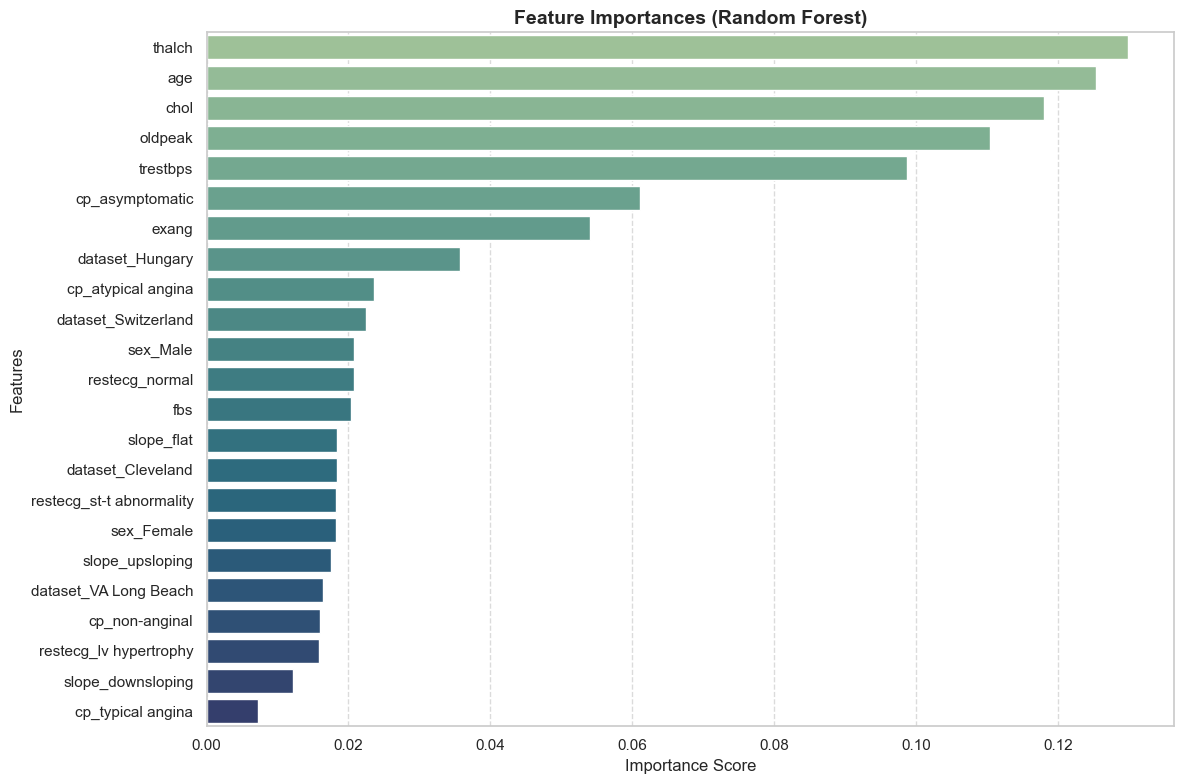

In [31]:
# =========================================
# 📊 Visualization: Feature Importance
# =========================================
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_features.values, y=ranked_features.index, palette='crest')
plt.title('Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
# =========================================
# 🎯 Select Top Features & Train Logistic Regression
# =========================================
n_top_features = 10
top_features = ranked_features.head(n_top_features).index.tolist()

X_train_importance = X_train[top_features]
X_test_importance = X_test[top_features]

logistic_regression_importance = LogisticRegression(random_state=42)
logistic_regression_importance.fit(X_train_importance, y_train)

y_pred_lr_importance = logistic_regression_importance.predict(X_test_importance)

accuracy_lr_importance = accuracy_score(y_test, y_pred_lr_importance)
precision_lr_importance = precision_score(y_test, y_pred_lr_importance, average='weighted')
recall_lr_importance = recall_score(y_test, y_pred_lr_importance, average='weighted')
f1_lr_importance = f1_score(y_test, y_pred_lr_importance, average='weighted')

print("Logistic Regression (Top Importance Features) Performance")
print(f"Accuracy:  {accuracy_lr_importance:.4f}")
print(f"Precision: {precision_lr_importance:.4f}")
print(f"Recall:    {recall_lr_importance:.4f}")
print(f"F1-score:  {f1_lr_importance:.4f}")


Logistic Regression (Top Importance Features) Performance
Accuracy:  0.5543
Precision: 0.4980
Recall:    0.5543
F1-score:  0.5035


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [33]:
# =========================================
# 📊 Append Logistic Regression (Importance) to Comparison
# =========================================
lr_importance_performance = pd.DataFrame({
    'Model': ['Logistic Regression (Importance)'],
    'Accuracy': [accuracy_lr_importance],
    'Precision': [precision_lr_importance],
    'Recall': [recall_lr_importance],
    'F1-score': [f1_lr_importance]
})

performance_comparison = pd.concat([performance_comparison, lr_importance_performance], ignore_index=True)
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

best_model = performance_comparison.loc[performance_comparison['Accuracy'].idxmax()]

print("Updated Model Performance Comparison")
display(performance_comparison)

print("\n🏆 Best Model Based on Accuracy")
display(best_model)


Updated Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.554348,0.509878,0.554348,0.515589
1,Logistic Regression (Importance),0.554348,0.497991,0.554348,0.503460
2,XGBoost,0.538043,0.500933,0.538043,0.512952
3,SVM,0.538043,0.444086,0.538043,0.472096
4,Logistic Regression (RFE),0.532609,0.484930,0.532609,0.490492
5,Random Forest,0.521739,0.457058,0.521739,0.479721
6,Decision Trees,0.500000,0.492266,0.500000,0.494396



🏆 Best Model Based on Accuracy


Model        Logistic Regression
Accuracy                0.554348
Precision               0.509878
Recall                  0.554348
F1-score                0.515589
Name: 0, dtype: object

In [34]:
# =========================================
# 📊 Chi-Square Feature Selection
# =========================================
from sklearn.feature_selection import chi2, SelectKBest

non_integer_cols_train = X_train.select_dtypes(exclude=np.integer).columns
for col in non_integer_cols_train:
    X_train[col] = X_train[col].astype(int)

non_integer_cols_test = X_test.select_dtypes(exclude=np.integer).columns
for col in non_integer_cols_test:
    X_test[col] = X_test[col].astype(int)

if (X_train < 0).any().any():
    X_train_non_negative = X_train.abs()
else:
    X_train_non_negative = X_train.copy()

chi_stats, p_values = chi2(X_train_non_negative, y_train)
k_features_to_select = 10
select_k_best = SelectKBest(score_func=chi2, k=k_features_to_select)
select_k_best.fit(X_train_non_negative, y_train)

selected_features = X_train_non_negative.columns[select_k_best.get_support()]
print(f"Selected Features Based on Chi-Square: {selected_features.tolist()}")


Selected Features Based on Chi-Square: ['chol', 'exang', 'oldpeak', 'sex_Female', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal']


In [35]:
# =========================================
# 🧠 Logistic Regression (Chi-Square Features)
# =========================================
X_train_chi2 = X_train[selected_features]
X_test_chi2 = X_test[selected_features]

logistic_regression_chi2 = LogisticRegression(random_state=42)
logistic_regression_chi2.fit(X_train_chi2, y_train)

y_pred_lr_chi2 = logistic_regression_chi2.predict(X_test_chi2)

accuracy_lr_chi2 = accuracy_score(y_test, y_pred_lr_chi2)
precision_lr_chi2 = precision_score(y_test, y_pred_lr_chi2, average='weighted')
recall_lr_chi2 = recall_score(y_test, y_pred_lr_chi2, average='weighted')
f1_lr_chi2 = f1_score(y_test, y_pred_lr_chi2, average='weighted')

print("Logistic Regression (Chi-Square) Performance")
print(f"Accuracy:  {accuracy_lr_chi2:.4f}")
print(f"Precision: {precision_lr_chi2:.4f}")
print(f"Recall:    {recall_lr_chi2:.4f}")
print(f"F1-score:  {f1_lr_chi2:.4f}")


Logistic Regression (Chi-Square) Performance
Accuracy:  0.5272
Precision: 0.4231
Recall:    0.5272
F1-score:  0.4672


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [36]:
# =========================================
# 📊 Append Logistic Regression (Chi-Square) to Comparison
# =========================================
lr_chi2_performance = pd.DataFrame({
    'Model': ['Logistic Regression (Chi-Square)'],
    'Accuracy': [accuracy_lr_chi2],
    'Precision': [precision_lr_chi2],
    'Recall': [recall_lr_chi2],
    'F1-score': [f1_lr_chi2]
})

performance_comparison = pd.concat([performance_comparison, lr_chi2_performance], ignore_index=True)
performance_comparison = performance_comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

best_model = performance_comparison.loc[performance_comparison['Accuracy'].idxmax()]

print("Updated Model Performance Comparison")
display(performance_comparison)

print("\n🏆 Best Model Based on Accuracy")
display(best_model)


Updated Model Performance Comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.554348,0.509878,0.554348,0.515589
1,Logistic Regression (Importance),0.554348,0.497991,0.554348,0.503460
2,XGBoost,0.538043,0.500933,0.538043,0.512952
3,SVM,0.538043,0.444086,0.538043,0.472096
4,Logistic Regression (RFE),0.532609,0.484930,0.532609,0.490492
5,Logistic Regression (Chi-Square),0.527174,0.423091,0.527174,0.467194
6,Random Forest,0.521739,0.457058,0.521739,0.479721
7,Decision Trees,0.500000,0.492266,0.500000,0.494396



🏆 Best Model Based on Accuracy


Model        Logistic Regression
Accuracy                0.554348
Precision               0.509878
Recall                  0.554348
F1-score                0.515589
Name: 0, dtype: object

In [37]:
# =========================================
# 📈 ROC Curve Data (OvR)
# =========================================
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
models = {
    'Logistic Regression': logistic_regression_model,
    'Decision Trees': decision_tree_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model,
    'XGBoost': xgboost_model,
    'Logistic Regression (RFE)': logistic_regression_rfe,
    'Logistic Regression (Chi-Square)': logistic_regression_chi2
}
test_data = {
    'Logistic Regression': X_test_pca,
    'Decision Trees': X_test_pca,
    'Random Forest': X_test_pca,
    'SVM': X_test_pca,
    'XGBoost': X_test_pca,
    'Logistic Regression (RFE)': X_test_rfe,
    'Logistic Regression (Chi-Square)': X_test_chi2
}

for model_name, model in models.items():
    y_prob = model.predict_proba(test_data[model_name])
    fpr[model_name], tpr[model_name], roc_auc[model_name] = {}, {}, {}
    for i in range(n_classes):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])


In [38]:
# =========================================
# 📊 Macro & Micro Average ROC
# =========================================
from numpy import interp

fpr_micro, tpr_micro, auc_micro = {}, {}, {}
fpr_macro, tpr_macro, auc_macro = {}, {}, {}

for model_name in models.keys():
    y_prob = models[model_name].predict_proba(test_data[model_name])

    # Micro-average
    fpr_micro[model_name], tpr_micro[model_name], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    auc_micro[model_name] = auc(fpr_micro[model_name], tpr_micro[model_name])

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[model_name][i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[model_name][i], tpr[model_name][i])
    mean_tpr /= n_classes

    fpr_macro[model_name] = all_fpr
    tpr_macro[model_name] = mean_tpr
    auc_macro[model_name] = np.mean([roc_auc[model_name][i] for i in range(n_classes)])


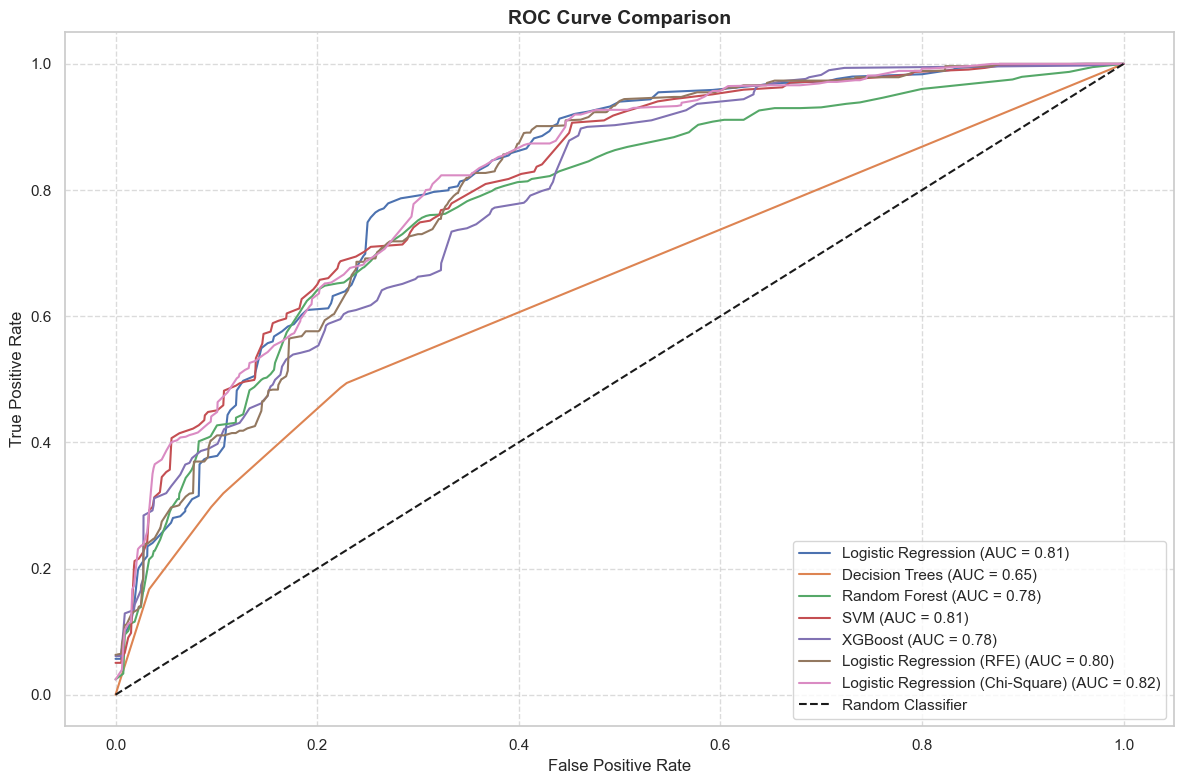

In [39]:
# =========================================
# 📊 ROC Curve Comparison
# =========================================
plt.figure(figsize=(12, 8))
for model_name in models.keys():
    plt.plot(fpr_macro[model_name], tpr_macro[model_name],
             label=f'{model_name} (AUC = {auc_macro[model_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


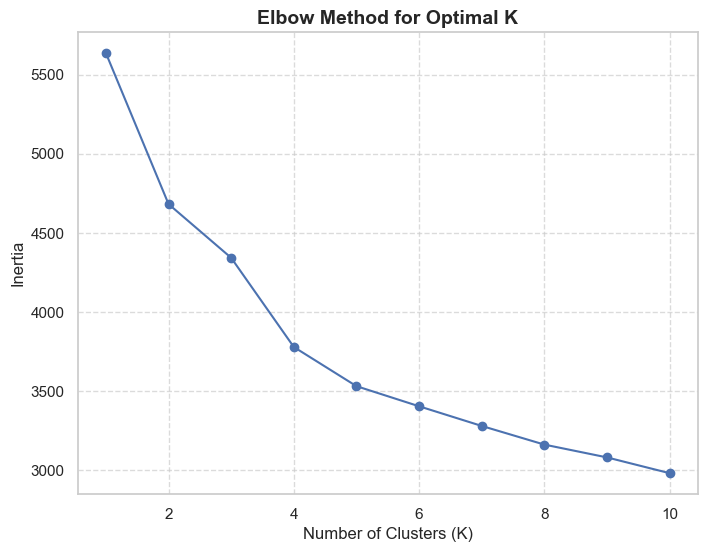

In [40]:
# =========================================
# 📊 K-Means Clustering: Elbow Method
# =========================================
from sklearn.cluster import KMeans

X_clustering = X_train_pca
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [41]:
# =========================================
# 🤖 K-Means Clustering with Optimal K
# =========================================
optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_model.fit(X_clustering)

kmeans_labels = kmeans_model.predict(X_clustering)
print("First 10 KMeans labels:", kmeans_labels[:10])


First 10 KMeans labels: [1 0 0 2 2 2 0 1 3 1]


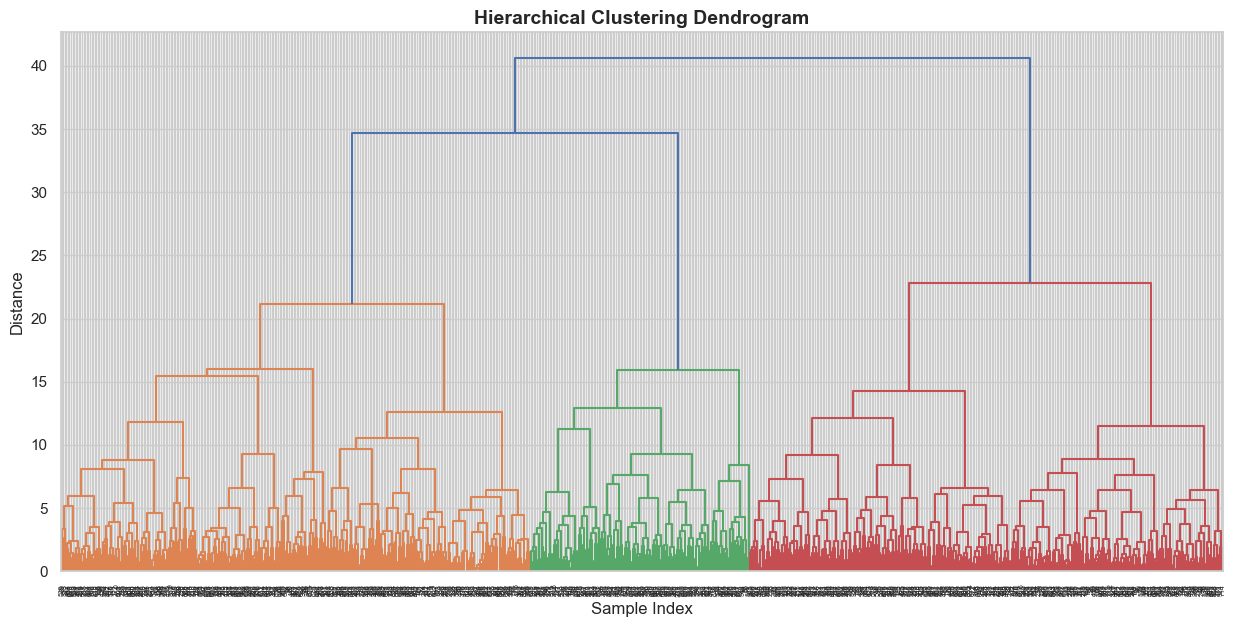

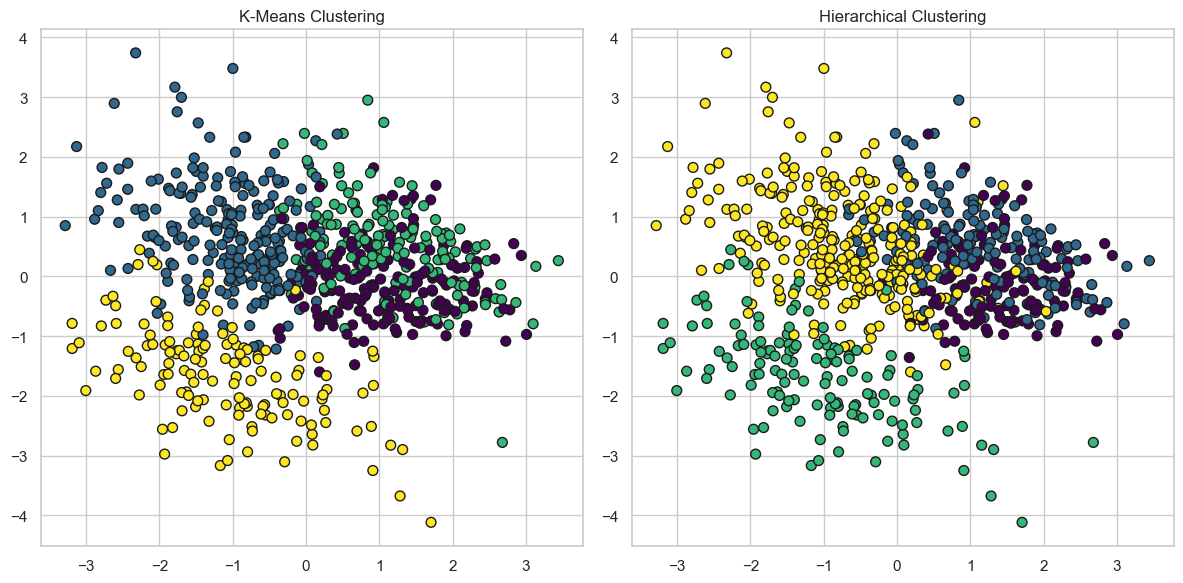

In [42]:
# =========================================
# 📊 Hierarchical Clustering & Visualization
# =========================================
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X_clustering, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.show()

hierarchical_labels = fcluster(linked, 4, criterion='maxclust')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_clustering[:, 0], X_clustering[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('K-Means Clustering', fontsize=12)
plt.subplot(1, 2, 2)
plt.scatter(X_clustering[:, 0], X_clustering[:, 1], c=hierarchical_labels, cmap='viridis', s=50, edgecolor='k')
plt.title('Hierarchical Clustering', fontsize=12)
plt.tight_layout()
plt.show()


In [43]:
# =========================================
# 📊 Clustering Evaluation
# =========================================
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari_kmeans = adjusted_rand_score(y_train, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y_train, kmeans_labels)

ari_hierarchical = adjusted_rand_score(y_train, hierarchical_labels)
nmi_hierarchical = normalized_mutual_info_score(y_train, hierarchical_labels)

print(f"K-Means ARI: {ari_kmeans:.4f}, NMI: {nmi_kmeans:.4f}")
print(f"Hierarchical ARI: {ari_hierarchical:.4f}, NMI: {nmi_hierarchical:.4f}")


K-Means ARI: 0.1126, NMI: 0.1548
Hierarchical ARI: 0.0679, NMI: 0.1339


In [44]:
# =========================================
# 📋 Define Logistic Regression & Parameter Grids
# =========================================
model = LogisticRegression(random_state=42)

# Parameter grid for GridSearchCV
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear'],
     'penalty': ['l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs'],
     'penalty': ['l2']}
]

# Parameter distribution for RandomizedSearchCV
param_distributions = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['liblinear'],
     'penalty': ['l1', 'l2']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['lbfgs'],
     'penalty': ['l2']}
]

print("Parameter Grid for GridSearchCV:")
print(param_grid)

print("\nParameter Distribution for RandomizedSearchCV:")
print(param_distributions)


Parameter Grid for GridSearchCV:
[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']}]

Parameter Distribution for RandomizedSearchCV:
[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'penalty': ['l2']}]


In [45]:
# =========================================
# 🔍 GridSearchCV for Logistic Regression
# =========================================
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_pca, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best Hyperparameters from GridSearchCV:")
print(best_params_grid)
print(f"\nBest Cross-Validation Accuracy: {best_score_grid:.4f}")


Best Hyperparameters from GridSearchCV:
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Best Cross-Validation Accuracy: 0.5897


In [46]:
# =========================================
# 🏆 Evaluate Best GridSearchCV Model
# =========================================
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_pca)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid, average='weighted')
recall_grid = recall_score(y_test, y_pred_grid, average='weighted')
f1_grid = f1_score(y_test, y_pred_grid, average='weighted')

print("Performance of Best Logistic Regression (GridSearchCV)")
print(f"Accuracy:  {accuracy_grid:.4f}")
print(f"Precision: {precision_grid:.4f}")
print(f"Recall:    {recall_grid:.4f}")
print(f"F1-score:  {f1_grid:.4f}")


Performance of Best Logistic Regression (GridSearchCV)
Accuracy:  0.5326
Precision: 0.4700
Recall:    0.5326
F1-score:  0.4686


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [47]:
# =========================================
# 🎲 RandomizedSearchCV for Logistic Regression
# =========================================
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_pca, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best Hyperparameters from RandomizedSearchCV:")
print(best_params_random)
print(f"\nBest Cross-Validation Accuracy: {best_score_random:.4f}")


Best Hyperparameters from RandomizedSearchCV:
{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

Best Cross-Validation Accuracy: 0.5788


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [48]:
# =========================================
# 🏆 Evaluate Best Logistic Regression (RandomizedSearchCV)
# =========================================
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test_pca)

accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')
f1_random = f1_score(y_test, y_pred_random, average='weighted')

print("Performance of Best Logistic Regression (RandomizedSearchCV)")
print(f"Accuracy:  {accuracy_random:.4f}")
print(f"Precision: {precision_random:.4f}")
print(f"Recall:    {recall_random:.4f}")
print(f"F1-score:  {f1_random:.4f}")


Performance of Best Logistic Regression (RandomizedSearchCV)
Accuracy:  0.5543
Precision: 0.5102
Recall:    0.5543
F1-score:  0.4854


c:\Users\night\.conda\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


C:\Users\night\AppData\Local\Temp\ipykernel_33504\2010230550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_comparison, x='Accuracy', y='Model', palette='mako')


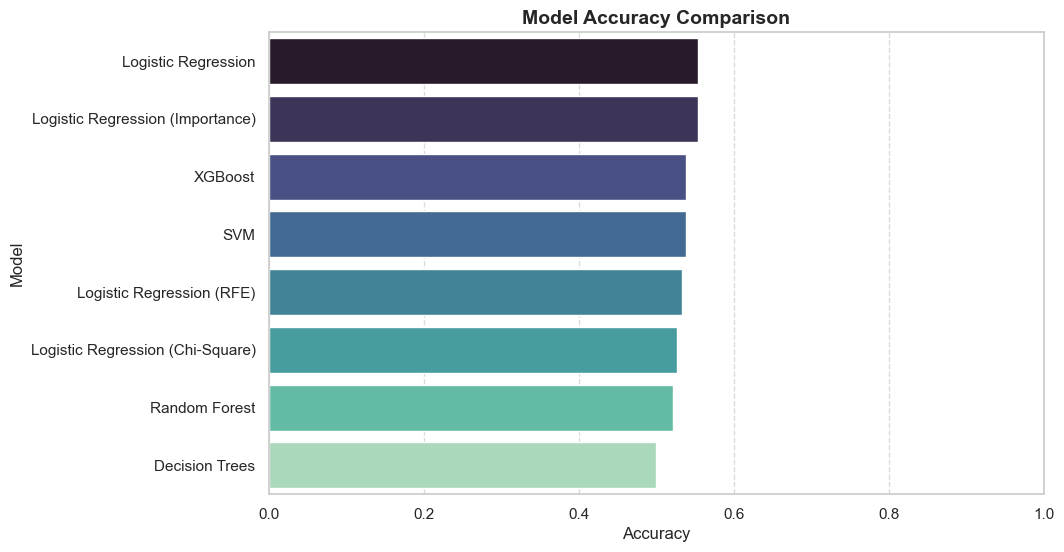

In [49]:
# =========================================
# 🏆 Final Model Performance Leaderboard
# =========================================
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_comparison, x='Accuracy', y='Model', palette='mako')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [50]:
import joblib
import os

# Define the directory to save the models
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

# Save the trained Logistic Regression model (best_grid_model)
joblib.dump(best_grid_model, os.path.join(output_dir, 'logistic_regression_model.pkl'))

# Save the StandardScaler
joblib.dump(scaler, os.path.join(output_dir, 'scaler.pkl'))

# Save the PCA object
joblib.dump(pca, os.path.join(output_dir, 'pca.pkl'))

print("Trained model, scaler, and PCA object saved successfully.")

Trained model, scaler, and PCA object saved successfully.
